1. 모델 훈련 코드 및 훈련 확인
2. 모델 구성 두가지 방법
  - Sequence API
  - Funtion API

In [1]:
# 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

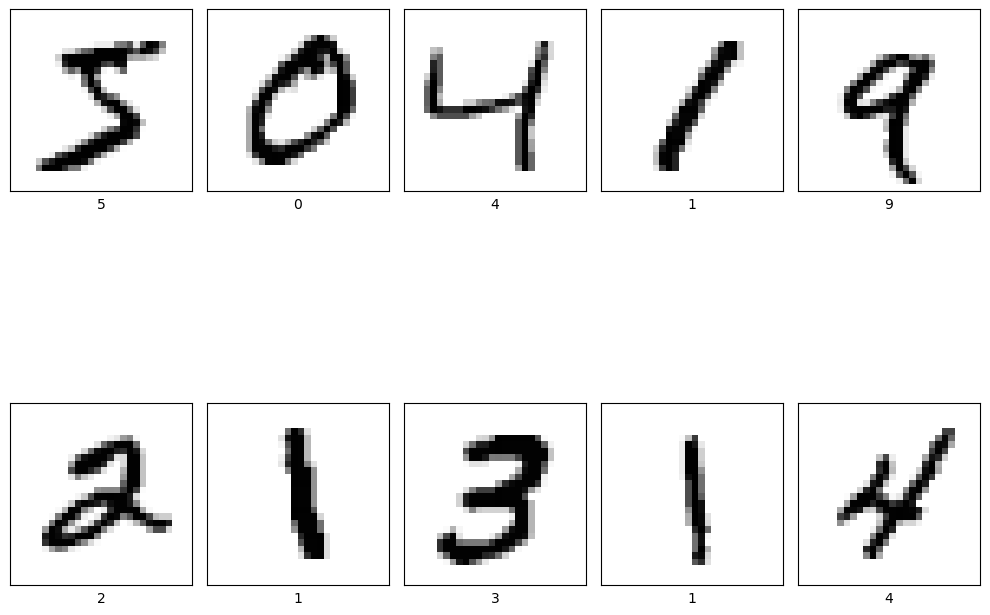

In [4]:
import matplotlib.pyplot as plt

# train_images의 첫 10개 이미지 시각화
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)  # 2x5 그리드로 이미지 배치
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)  # 28x28 이미지 형태로 변환하여 표시
    plt.xlabel(train_labels[i])  # 각 이미지 아래에 라벨 표시
plt.tight_layout()
plt.show()


- 이미지가 들어가고 총 10개의 분류
- 이미지가 픽섹당 0~255 범위를 가짐 : 정규화가 필요한 상황

In [5]:
# 이미지 데이터를 1차원 벡터로 변환   (train_images, train_labels), (test_images, test_labels)
train_images = train_images.reshape(60000, 784).astype('float32') / 255
test_images = test_images.reshape(10000, 784).astype('float32') / 255

In [ ]:
#타겟 원-핫인코딩
train_images_cat = to_categorical(train_labels,10)
test_images_cat = to_categorical(test_labels,10)

In [9]:
# 모델을 구성
model = models.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = (28 * 28,)),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = "softmax") # 출력층

    ]
)

c:\Users\jd421\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#모델을 컴파일
model.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [11]:
#모델을 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,658 (1.02 MB)

 Trainable params: 267,658 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 모델 학습
history = model.fit(train_images , train_images_cat,
                    epochs =10,
                    batch_size = 64,
                    validation_split = 0.2)



Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8526 - loss: 0.4751 - val_accuracy: 0.9590 - val_loss: 0.1337
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9671 - loss: 0.1098 - val_accuracy: 0.9648 - val_loss: 0.1173
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9769 - loss: 0.0767 - val_accuracy: 0.9710 - val_loss: 0.0995
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9826 - loss: 0.0557 - val_accuracy: 0.9705 - val_loss: 0.1050
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9850 - loss: 0.0470 - val_accuracy: 0.9746 - val_loss: 0.0925
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9877 - loss: 0.0387 - val_accuracy: 0.9703 - val_loss: 0.1216
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9707 - val_loss: 0.1067
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.

In [13]:
#모델 평가
test_loss , test_acc = model.evaluate(test_images, test_images_cat, verbose=2)
print(f'\n테스트 정확도: {test_acc:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.9791 - loss: 0.0893

테스트 정확도: 0.9791
